In [3]:
import pandas as pd
import numpy as np
import datetime as datetime

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
data = pd.read_csv('../projectwind/data/raw_data.csv', index_col=0, parse_dates=True, dayfirst=True)

In [95]:
data.head()

,Misalignment 1,Power 1,Nacelle Orientation 1,Wind Speed 1,Blade Pitch 1,Misalignment 2,Power 2,Nacelle Orientation 2,Wind Speed 2,Blade Pitch 2,...,Misalignment 24,Power 24,Nacelle Orientation 24,Wind Speed 24,Blade Pitch 24,Misalignment 25,Power 25,Nacelle Orientation 25,Wind Speed 25,Blade Pitch 25
Datetime,,,,,,,,,,,,,,,,,,,,,
2019-01-05 00:00:00,352.6418,1748.94,139.5922,10.1212,-0.6609,357.1708,1841.91,339.8458,10.3253,-0.8578,...,354.6694,1291.06,63.0,8.8373,-0.9087,359.0061,1360.88,85.0,8.7587,-0.7877
2019-01-05 00:10:00,1.5354,1712.80,134.0000,9.3673,-0.3824,359.6353,1960.11,339.0000,10.3788,-0.8060,...,358.0417,1317.95,63.0,8.6073,-0.7432,1.8556,1588.45,85.0,9.0568,-0.5709
2019-01-05 00:20:00,0.2834,2064.15,134.0000,10.3667,1.0528,1.7305,1921.56,339.0000,10.1628,-0.7832,...,357.7514,1134.93,63.0,8.2067,-0.7510,359.2915,1822.61,85.0,9.8567,-0.4996
2019-01-05 00:30:00,357.3376,2061.11,134.0000,11.2020,3.0485,358.7202,2080.04,339.0000,10.8123,0.7287,...,356.6621,1178.57,63.0,8.4860,-0.8185,358.6694,1826.85,85.0,9.8418,-0.4788
2019-01-05 00:40:00,357.9806,2081.33,134.0000,11.1048,3.1102,358.0829,2088.48,339.0000,10.8333,0.4868,...,356.3252,1147.18,63.0,8.5223,-0.8777,359.0999,1461.52,85.0,9.0207,-0.8073


# Value Cleaning

## Repeating Sensor Values

In [70]:
clean_data = pd.DataFrame()
for col in data.columns:
    # Do not apply to Nacelle Orientation data
    if 'Nacelle' not in col:
        erroneous_data = data[col].diff() == 0
        print(col, erroneous_data.sum())
        clean_data[col] = data[col].mask(erroneous_data, other=np.nan)

Misalignment 1 125
Power 1 577
Wind Speed 1 140
Blade Pitch 1 2544
Misalignment 2 164
Power 2 665
Wind Speed 2 169
Blade Pitch 2 3043
Misalignment 3 46
Power 3 739
Wind Speed 3 54
Blade Pitch 3 2771
Misalignment 4 17520
Power 4 435
Wind Speed 4 8
Blade Pitch 4 3318
Misalignment 5 21
Power 5 432
Wind Speed 5 38
Blade Pitch 5 2737
Misalignment 6 16
Power 6 582
Wind Speed 6 22
Blade Pitch 6 2786
Misalignment 7 14
Power 7 564
Wind Speed 7 22
Blade Pitch 7 3053
Misalignment 8 7
Power 8 567
Wind Speed 8 17
Blade Pitch 8 3234
Misalignment 9 139
Power 9 1145
Wind Speed 9 145
Blade Pitch 9 3883
Misalignment 10 135
Power 10 675
Wind Speed 10 141
Blade Pitch 10 3672
Misalignment 11 35
Power 11 1029
Wind Speed 11 48
Blade Pitch 11 3330
Misalignment 12 6
Power 12 899
Wind Speed 12 12
Blade Pitch 12 3461
Misalignment 13 1
Power 13 693
Wind Speed 13 10
Blade Pitch 13 3188
Misalignment 14 930
Power 14 1852
Wind Speed 14 948
Blade Pitch 14 4172
Misalignment 15 87
Power 15 895
Wind Speed 15 98
Blade Pit

In [69]:
clean_data

,Misalignment 1,Power 1,Wind Speed 1,Blade Pitch 1,Misalignment 2,Power 2,Wind Speed 2,Blade Pitch 2,Misalignment 3,Power 3,...,Wind Speed 23,Blade Pitch 23,Misalignment 24,Power 24,Wind Speed 24,Blade Pitch 24,Misalignment 25,Power 25,Wind Speed 25,Blade Pitch 25
Datetime,,,,,,,,,,,,,,,,,,,,,
2019-01-05 00:00:00,352.6418,1748.94,10.1212,-0.6609,357.1708,1841.91,10.3253,-0.8578,357.2058,2037.80,...,8.3545,-0.8122,354.6694,1291.06,8.8373,-0.9087,359.0061,1360.88,8.7587,-0.7877
2019-01-05 00:10:00,1.5354,1712.80,9.3673,-0.3824,359.6353,1960.11,10.3788,-0.8060,359.3342,2107.26,...,8.1715,-0.5757,358.0417,1317.95,8.6073,-0.7432,1.8556,1588.45,9.0568,-0.5709
2019-01-05 00:20:00,0.2834,2064.15,10.3667,1.0528,1.7305,1921.56,10.1628,-0.7832,0.7430,2060.20,...,9.0407,-0.7165,357.7514,1134.93,8.2067,-0.7510,359.2915,1822.61,9.8567,-0.4996
2019-01-05 00:30:00,357.3376,2061.11,11.2020,3.0485,358.7202,2080.04,10.8123,0.7287,356.7274,2110.21,...,9.1515,-0.8087,356.6621,1178.57,8.4860,-0.8185,358.6694,1826.85,9.8418,-0.4788
2019-01-05 00:40:00,357.9806,2081.33,11.1048,3.1102,358.0829,2088.48,10.8333,0.4868,358.1323,2098.18,...,9.1872,-0.7760,356.3252,1147.18,8.5223,-0.8777,359.0999,1461.52,9.0207,-0.8073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-30 23:10:00,2.7608,55.98,3.8052,2.5573,352.7160,25.96,3.0810,17.8690,13.7920,8.35,...,3.9070,2.4112,3.2703,55.32,3.6903,2.7367,2.4333,73.14,3.9358,2.4642
2021-09-30 23:20:00,2.6050,145.32,4.4225,1.8617,4.3406,87.20,3.4140,2.9278,5.3710,37.94,...,4.3710,1.8684,2.4844,93.53,3.9543,2.4182,359.5413,143.54,4.5942,1.6195
2021-09-30 23:30:00,2.8462,191.30,4.5505,1.6542,357.2821,30.59,3.0965,3.1997,356.9602,-5.00,...,5.2927,0.2377,0.1687,146.11,4.4497,1.8082,356.5980,220.62,5.2103,0.3908


# Index Cleaning

In [7]:
data.sort_index(inplace=True)

In [8]:
start_date = data.index.min()
end_date = data.index.max()
freq = '10T'
start_date, end_date

(Timestamp('2019-01-05 00:00:00'), Timestamp('2021-12-09 23:50:00'))

In [9]:
ref_date_range = pd.date_range(start_date, end_date, freq=freq)
ref_df = pd.DataFrame(index=ref_date_range)
print(f"ref_index length: {'{:,}'.format(len(ref_date_range))} \n",
      f"data.index length: {'{:,}'.format(len(data.index))} \n", 
      f"missing values: {'{:,}'.format(len(ref_date_range)-len(data.index))}")

ref_index length: 154,080 
 data.index length: 123,037 
 missing values: 31,043


In [10]:
index_na = (len(ref_date_range)-len(data.index))/len(ref_date_range)
index_na

0.2014732606438214

In [11]:
clean_data = data.reindex(ref_df.index)

In [12]:
clean_data[clean_data.index.duplicated(keep=False)==True].index

DatetimeIndex([], dtype='datetime64[ns]', freq='10T')

In [33]:
# Number na / month
na = clean_data.isna()

In [39]:
na.resample('M').sum().mean(axis=1)/ 4320 *100

2019-01-31    65.760556
2019-02-28    68.890926
2019-03-31    78.405370
2019-04-30    74.793519
2019-05-31    17.363333
2019-06-30    18.352778
2019-07-31    43.661667
2019-08-31    23.712037
2019-09-30    15.157963
2019-10-31    27.435556
2019-11-30    14.923148
2019-12-31    18.522407
2020-01-31     3.877593
2020-02-29     6.620741
2020-03-31     1.139074
2020-04-30     2.082222
2020-05-31     3.788148
2020-06-30     1.552222
2020-07-31     2.939444
2020-08-31     4.840000
2020-09-30     3.835000
2020-10-31     5.556852
2020-11-30     3.010926
2020-12-31     1.871667
2021-01-31    11.735741
2021-02-28    13.218889
2021-03-31    11.613519
2021-04-30    14.126667
2021-05-31    11.562778
2021-06-30    11.949630
2021-07-31    13.354630
2021-08-31    11.940185
2021-09-30    11.573704
2021-10-31    73.960000
2021-11-30    70.354259
2021-12-31     1.200370
Freq: M, dtype: float64

In [40]:
# Clean data slice
clean_data = clean_data.loc['2019-05-01':'2021-09-30']

# Analysis

In [96]:
clean_data.columns

Index(['Misalignment 1', 'Power 1', 'Wind Speed 1', 'Blade Pitch 1',
       'Misalignment 2', 'Power 2', 'Wind Speed 2', 'Blade Pitch 2',
       'Misalignment 3', 'Power 3', 'Wind Speed 3', 'Blade Pitch 3',
       'Misalignment 4', 'Power 4', 'Wind Speed 4', 'Blade Pitch 4',
       'Misalignment 5', 'Power 5', 'Wind Speed 5', 'Blade Pitch 5',
       'Misalignment 6', 'Power 6', 'Wind Speed 6', 'Blade Pitch 6',
       'Misalignment 7', 'Power 7', 'Wind Speed 7', 'Blade Pitch 7',
       'Misalignment 8', 'Power 8', 'Wind Speed 8', 'Blade Pitch 8',
       'Misalignment 9', 'Power 9', 'Wind Speed 9', 'Blade Pitch 9',
       'Misalignment 10', 'Power 10', 'Wind Speed 10', 'Blade Pitch 10',
       'Misalignment 11', 'Power 11', 'Wind Speed 11', 'Blade Pitch 11',
       'Misalignment 12', 'Power 12', 'Wind Speed 12', 'Blade Pitch 12',
       'Misalignment 13', 'Power 13', 'Wind Speed 13', 'Blade Pitch 13',
       'Misalignment 14', 'Power 14', 'Wind Speed 14', 'Blade Pitch 14',
       'Misali

In [89]:
cat = 'Nacelle Orientation'

In [90]:
data_cat = pd.DataFrame()
for col in clean_data.columns:
    if cat in col:
        data_cat[col] = clean_data[col].copy()

In [92]:
data_cat.head()

""


In [82]:
data_cat.describe()

,Power 1,Power 2,Power 3,Power 4,Power 5,Power 6,Power 7,Power 8,Power 9,Power 10,...,Power 16,Power 17,Power 18,Power 19,Power 20,Power 21,Power 22,Power 23,Power 24,Power 25
count,122455.00000,120374.000000,121018.000000,120308.000000,121005.000000,120225.000000,120705.000000,119904.000000,119992.000000,120655.000000,...,118754.000000,119755.000000,120587.000000,120485.000000,119097.000000,118158.000000,120278.000000,120274.000000,120931.000000,119718.000000
mean,846.33887,796.795507,866.375437,676.426840,779.090129,804.804656,843.398681,805.903616,764.109891,772.312478,...,739.345447,791.522581,732.355534,819.623249,757.339708,697.268010,789.133258,792.928465,810.914938,826.172845
std,690.17045,674.044410,698.936256,610.972407,671.186482,676.338997,697.520552,681.290835,659.379392,667.838001,...,643.415193,677.854000,643.136179,681.243379,659.948887,618.603354,665.859648,679.064569,689.988168,678.642799
min,-28.84000,-32.050000,-30.610000,-35.580000,-29.710000,-37.560000,-29.650000,-28.540000,-28.380000,-31.800000,...,-27.090000,-35.670000,-25.820000,-27.540000,-28.710000,-27.990000,-28.420000,-28.580000,-30.010000,-25.890000
25%,236.03500,202.490000,234.415000,171.980000,208.290000,198.550000,209.300000,211.347500,192.507500,191.225000,...,184.542500,203.360000,183.460000,220.000000,190.830000,177.202500,212.142500,196.092500,209.115000,237.412500
50%,700.52000,647.830000,738.335000,520.320000,601.080000,667.050000,710.100000,647.000000,606.080000,612.060000,...,587.380000,624.560000,570.120000,670.770000,587.820000,547.965000,638.625000,632.590000,642.250000,682.350000
75%,1400.33000,1302.107500,1447.822500,1037.377500,1262.040000,1324.090000,1410.570000,1319.190000,1230.582500,1248.225000,...,1180.375000,1295.910000,1164.235000,1338.300000,1228.400000,1082.870000,1272.772500,1295.697500,1337.160000,1343.780000
max,2119.61000,2153.500000,2119.950000,2120.870000,2120.700000,2120.420000,2120.840000,2119.740000,2120.430000,2120.000000,...,2120.820000,2119.660000,2119.740000,2120.170000,2172.500000,2119.590000,2120.760000,2119.690000,2120.310000,2119.660000


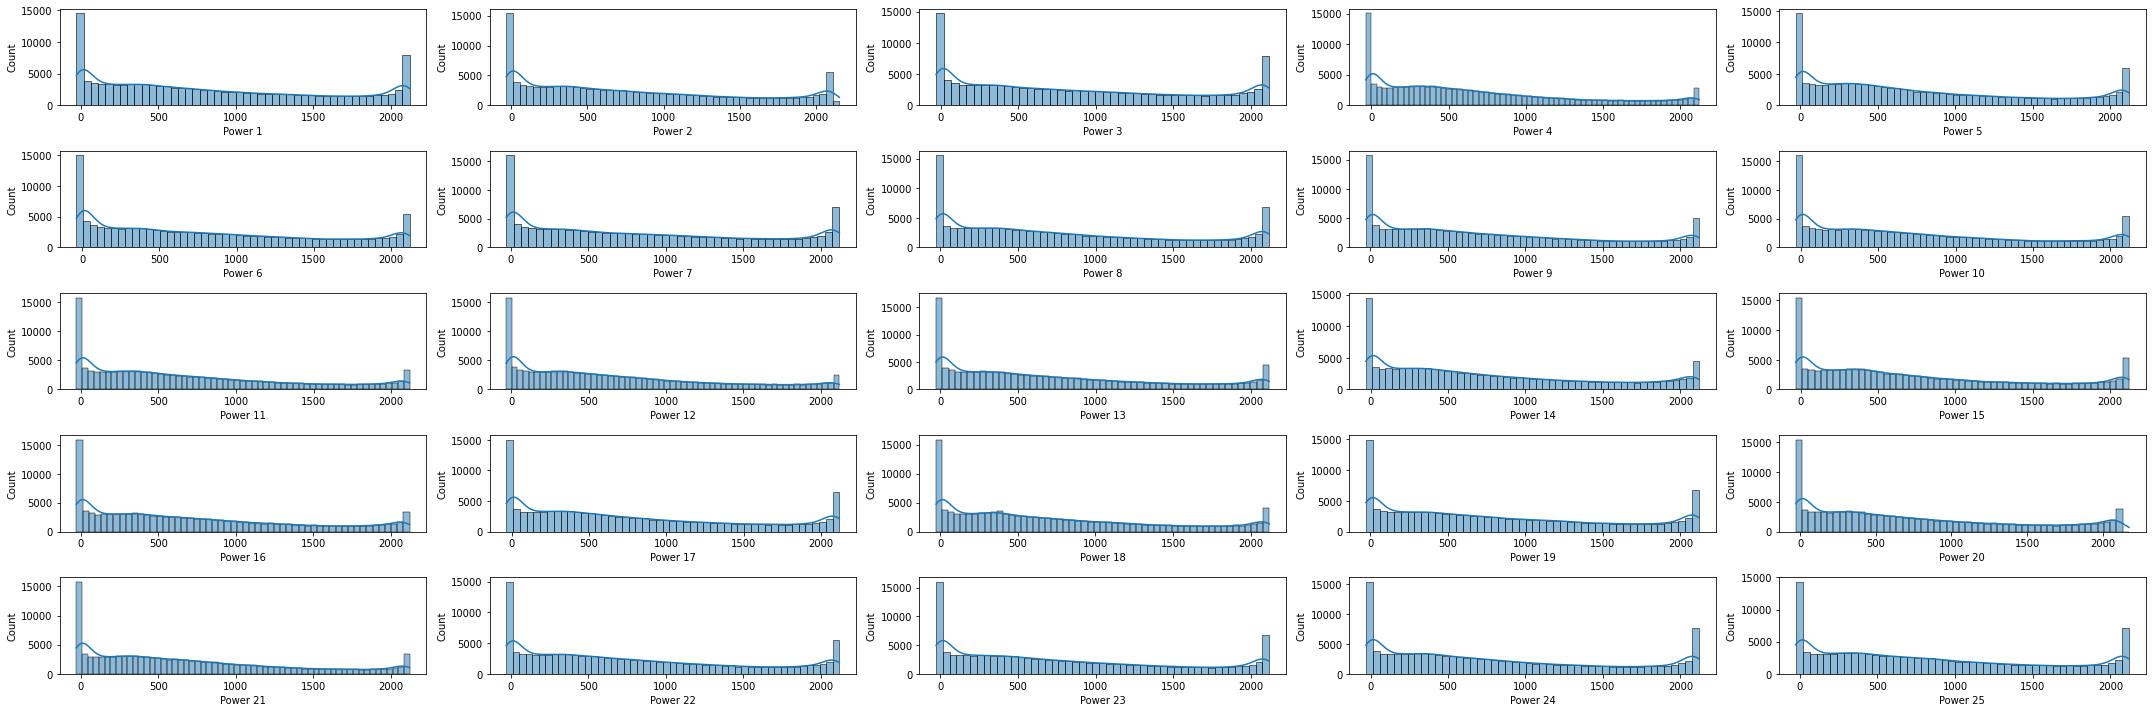

In [83]:
fig, axes = plt.subplots(5, 5, figsize=(30, 10))
for i in range(len(data_cat.columns)):
    row, col = i//5, i%5
    sns.histplot(ax=axes[row,col], data=data_cat, x=data_cat.columns[i], kde=True)
plt.tight_layout()

In [97]:
daily_data = data_cat.groupby([data_cat.index.year, 
                                data_cat.index.month, 
                                data_cat.index.day])
data_min = data_cat.min().min()
data_max = data_cat.max().max()
for day, data in daily_data:
    if day[2] == 30:
        fig, ax = plt.subplots(figsize=(20,8))
        ax.plot(data)
        ax.set_title(day, size=22)
        ax.set_ylim(data_min,data_max)
        plt.grid(True)
        plt.xlabel('Date & Time', fontsize=18)

AttributeError: 'Index' object has no attribute 'year'